## Question 1 : Snake and Ladders game

 - State space $S = \{0,1,2,3,...,99,100\}$, with $0$ being the start state and $100$ being the terminal state .
 - Transition probabilities structure : A matrix $M$ of 101x101

## Question 2 (Simpler example without snakes and ladder)

In [180]:
#importing the os module
import os
import matplotlib.pyplot as plt
#to get the current working directory
directory = os.getcwd()

print(directory)

/Users/Alex/Desktop/Documents_4A/Winter_quarter_1/MS&E_346/RL_book


In [46]:
os.chdir('/Users/Alex/Desktop/Documents_4A/Winter_quarter_1/MS&E_346/RL_book/')

In [47]:
from rl.markov_process import *

In [48]:
from typing import Mapping
from rl.distribution import Distribution, FiniteDistribution

In [89]:
from dataclasses import dataclass
from typing import Mapping, Dict
from rl.distribution import Categorical, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess

@dataclass(frozen = True)
class CaseState:
    case_number: int
    def position(self) -> int:
        return self.case_number

In [173]:
#Simple example without the snakes and ladders

class SnakeAndLadderMPF(FiniteMarkovProcess[CaseState]):
    def __init__(
        self,
        my_pos : int):
        self.my_pos :int = my_pos
        super().__init__(self.get_transition_map())
        
    def get_transition_map(self) -> \
            Mapping[CaseState, FiniteDistribution[CaseState]]:
        d : Dict[CaseState, Categorical[CaseState]] = {}
        for i in range(1,94):
            d[CaseState(i)] = Categorical({CaseState(i+j) : 1/6 for j in range(1,7)})
        for i in range(94,100):
            state_probs_map : Mapping[CaseState, float] = {}
            for j in range(1,100-i):
                state_probs_map[CaseState(i+j)] = 1/6
            state_probs_map[(CaseState(100))] = (i+6 - 99)/6
            d[CaseState(i)] = Categorical(state_probs_map)
        d[Terminal(CaseState(100))] = Categorical({(CaseState(100)) : 1})
        return d

In [174]:
user_pos = 1
snake_mp = SnakeAndLadderMPF(
    my_pos=user_pos)

print(snake_mp)

From State CaseState(case_number=1):
  To State CaseState(case_number=2) with Probability 0.167
  To State CaseState(case_number=3) with Probability 0.167
  To State CaseState(case_number=4) with Probability 0.167
  To State CaseState(case_number=5) with Probability 0.167
  To State CaseState(case_number=6) with Probability 0.167
  To State CaseState(case_number=7) with Probability 0.167
From State CaseState(case_number=2):
  To State CaseState(case_number=3) with Probability 0.167
  To State CaseState(case_number=4) with Probability 0.167
  To State CaseState(case_number=5) with Probability 0.167
  To State CaseState(case_number=6) with Probability 0.167
  To State CaseState(case_number=7) with Probability 0.167
  To State CaseState(case_number=8) with Probability 0.167
From State CaseState(case_number=3):
  To State CaseState(case_number=4) with Probability 0.167
  To State CaseState(case_number=5) with Probability 0.167
  To State CaseState(case_number=6) with Probability 0.167
  To

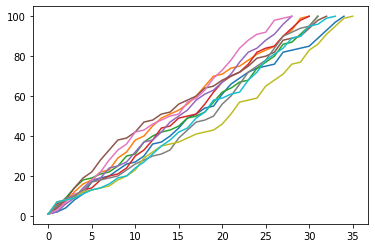

In [197]:
# Generate and plot traces
from rl.distribution import Constant
import numpy as np

for q in range(10):
    start_state_distribution = Constant(NonTerminal(CaseState(1)))
    val_list = [i.state.case_number for i in snake_mp.simulate(start_state_distribution)]
    plt.plot(val_list)
plt.show()

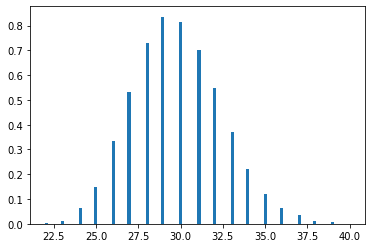

In [199]:
#Number of time steps to finish the game

N = 10000
start_state_distribution = Constant(NonTerminal(CaseState(1)))

time_steps_list = []

for q in range(N):
    val_list = [i.state.case_number for i in snake_mp.simulate(start_state_distribution)]
    time_steps_list.append(len(val_list))

plt.close()
plt.hist(time_steps_list,bins = 100,density=True)
plt.show()

### Simplest Example Weather

In [83]:
from typing import Sequence
from rl.distribution import Categorical, FiniteDistribution

dict ={"Rain": Categorical({"Rain": 0.3, "Nice": 0.7}), "Snow": Categorical({"Rain": 0.4, "Snow": 0.6}), "Nice": Categorical({"Rain": 0.2, "Snow": 0.3})}

In [85]:
@dataclass(frozen = True)
class WeatherState:
    weather_type: str
    def meteo(self) -> str:
        return self.weather_type
    
class Weather_MPF(FiniteMarkovProcess[WeatherState]):
    def __init__(
        self,
        my_meteo : str):
        self.my_meteo :str = my_meteo
        super().__init__(self.get_transition_map())
        
    def get_transition_map(self) -> Mapping[WeatherState, FiniteDistribution[WeatherState]]:
        d = {WeatherState("Rain"): Categorical({WeatherState("Rain"): 0.3, WeatherState("Nice"): 0.7}), WeatherState("Snow"): Categorical({WeatherState("Rain"): 0.4, WeatherState("Snow"): 0.6}), WeatherState("Nice"): Categorical({WeatherState("Rain"): 0.2, WeatherState("Snow"): 0.3})}
        return d

In [88]:
test_mp = Weather_MPF("Nice")
print(test_mp)

From State WeatherState(weather_type='Rain'):
  To State WeatherState(weather_type='Rain') with Probability 0.300
  To State WeatherState(weather_type='Nice') with Probability 0.700
From State WeatherState(weather_type='Snow'):
  To State WeatherState(weather_type='Rain') with Probability 0.400
  To State WeatherState(weather_type='Snow') with Probability 0.600
From State WeatherState(weather_type='Nice'):
  To State WeatherState(weather_type='Rain') with Probability 0.400
  To State WeatherState(weather_type='Snow') with Probability 0.600



## Question 3 : Frog Problem

We consider the State space {0,1,...,10}, with $i \in \{0,1,...,10\}$ representing the nulber of the leaf the frog is on. The state 10 is a terminating state and we begin at State 0.

For $j>i$, we have $P(i,j) = \frac{1}{(10-i)}$ and for $j\leq i$ we have $P(i,j)=0$

The reward of each transition $i \rightarrow j$ is $R(i,j) = 1$, we count the number of jumps.



In [227]:
#Frog Finite Markov Reward Process
@dataclass(frozen = True)
class CaseState:
    case_number: int
    def position(self) -> int:
        return self.case_number

class FrogMRPF(FiniteMarkovRewardProcess[CaseState]):
    def __init__(
        self,
        my_pos : int,
        jumps : float): #The reward is the number of throw
        self.my_pos :int = my_pos
        self.jumps :float = jumps
        super().__init__(self.get_transition_reward_map())
        
    def get_transition_reward_map(self) -> \
            Mapping[CaseState, FiniteDistribution[Tuple[CaseState,float]]]:
        d : Dict[CaseState, Categorical[Tuple[CaseState,float]]] = {}
        for i in range(0,10):
            d[CaseState(i)] = Categorical({(CaseState(j),self.jumps + 1) : 1/(10-i) for j in range(i+1,11)})
        d[Terminal(CaseState(10))] = Categorical({(CaseState(10),self.jumps) : 1})
        return d

In [228]:
frog_mrp = FrogMRPF(my_pos = 0, jumps = 0)
print(frog_mrp)

From State CaseState(case_number=0):
  To [State CaseState(case_number=1) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=2) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=3) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=4) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=5) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=6) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=7) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=8) and Reward 1.000] with Probability 0.100
  To [State CaseState(case_number=9) and Reward 1.000] with Probability 0.100
  To [Terminal State CaseState(case_number=10) and Reward 1.000] with Probability 0.100
From State CaseState(case_number=1):
  To [State CaseState(case_number=2) and Reward 1.000] with Probability 0.111
  To [State CaseState(case_number=3) and Reward 1.000] wit

In [229]:
frog_mrp.display_value_function(gamma=1)

{NonTerminal(state=CaseState(case_number=1)): 2.829,
 NonTerminal(state=CaseState(case_number=2)): 2.718,
 NonTerminal(state=CaseState(case_number=0)): 2.929,
 NonTerminal(state=CaseState(case_number=3)): 2.593,
 NonTerminal(state=CaseState(case_number=5)): 2.283,
 NonTerminal(state=CaseState(case_number=4)): 2.45,
 NonTerminal(state=CaseState(case_number=6)): 2.083,
 NonTerminal(state=CaseState(case_number=7)): 1.833,
 NonTerminal(state=CaseState(case_number=8)): 1.5,
 NonTerminal(state=CaseState(case_number=9)): 1.0,
 NonTerminal(state=Terminal(state=CaseState(case_number=10))): 0.0}


#### We obtain an expected number of 2.929 jumps for the frog to cross the river

## Question 4 : Reward Process

In [213]:
from dataclasses import dataclass
from typing import Mapping, Dict
from rl.distribution import Categorical, FiniteDistribution
from rl.markov_process import FiniteMarkovProcess

@dataclass(frozen = True)
class CaseState:
    case_number: int
    def position(self) -> int:
        return self.case_number


#Simple example without the snakes and ladders

class SnakeAndLadderMRPF(FiniteMarkovRewardProcess[CaseState]):
    def __init__(
        self,
        my_pos : int,
        throw : float): #The reward is the number of throw
        self.my_pos :int = my_pos
        self.throw :float = throw
        super().__init__(self.get_transition_reward_map())
        
    def get_transition_reward_map(self) -> \
            Mapping[CaseState, FiniteDistribution[Tuple[CaseState,float]]]:
        d : Dict[CaseState, Catego@rical[Tuple[CaseState,float]]] = {}
        for i in range(1,94):
            d[CaseState(i)] = Categorical({(CaseState(i+j),self.throw + 1) : 1/6 for j in range(1,7)})
        for i in range(94,100):
            state_probs_map : Mapping[Tuple[CaseState, float], float] = {}
            for j in range(1,100-i):
                state_probs_map[(CaseState(i+j),self.throw + 1)] = 1/6
            state_probs_map[((CaseState(100),self.throw + 1))] = (i+6 - 99)/6
            d[CaseState(i)] = Categorical(state_probs_map)
        d[Terminal(CaseState(100))] = Categorical({(CaseState(100),self.throw) : 1})
        return d

In [214]:
#Transition Probabilities
user_pos = 1
init_throw = 0
snake_mrp = SnakeAndLadderMRPF(my_pos=user_pos, throw = init_throw)

print(snake_mrp)

From State CaseState(case_number=1):
  To [State CaseState(case_number=2) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=3) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=4) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=5) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=6) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=7) and Reward 1.000] with Probability 0.167
From State CaseState(case_number=2):
  To [State CaseState(case_number=3) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=4) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=5) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=6) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=7) and Reward 1.000] with Probability 0.167
  To [State CaseState(case_number=8) and Reward 1.000] with Probabil

In [210]:
#Simulate MRP

from rl.distribution import Constant
import numpy as np

start_state_distribution = Constant(NonTerminal(CaseState(1)))
val_list = [i for i in snake_mrp.simulate_reward(start_state_distribution)]
print(val_list)

[TransitionStep(state=NonTerminal(state=CaseState(case_number=1)), next_state=NonTerminal(state=CaseState(case_number=6)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=6)), next_state=NonTerminal(state=CaseState(case_number=8)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=8)), next_state=NonTerminal(state=CaseState(case_number=12)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=12)), next_state=NonTerminal(state=CaseState(case_number=13)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=13)), next_state=NonTerminal(state=CaseState(case_number=14)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=14)), next_state=NonTerminal(state=CaseState(case_number=20)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_number=20)), next_state=NonTerminal(state=CaseState(case_number=23)), reward=1), TransitionStep(state=NonTerminal(state=CaseState(case_numbe

In [221]:
#The value function is the number of throws
snake_mrp.display_value_function(gamma=1)

{NonTerminal(state=CaseState(case_number=7)): 27.048,
 NonTerminal(state=CaseState(case_number=8)): 26.762,
 NonTerminal(state=CaseState(case_number=9)): 26.476,
 NonTerminal(state=CaseState(case_number=10)): 26.19,
 NonTerminal(state=CaseState(case_number=11)): 25.905,
 NonTerminal(state=CaseState(case_number=68)): 9.619,
 NonTerminal(state=CaseState(case_number=64)): 10.762,
 NonTerminal(state=CaseState(case_number=67)): 9.905,
 NonTerminal(state=CaseState(case_number=66)): 10.19,
 NonTerminal(state=CaseState(case_number=65)): 10.476,
 NonTerminal(state=CaseState(case_number=63)): 11.048,
 NonTerminal(state=CaseState(case_number=62)): 11.333,
 NonTerminal(state=CaseState(case_number=61)): 11.619,
 NonTerminal(state=CaseState(case_number=60)): 11.905,
 NonTerminal(state=CaseState(case_number=59)): 12.19,
 NonTerminal(state=CaseState(case_number=1)): 28.762,
 NonTerminal(state=CaseState(case_number=2)): 28.476,
 NonTerminal(state=CaseState(case_number=3)): 28.19,
 NonTerminal(state=Cas

#### Result : The expected number of throw is displayed at case_number = 1 and we get 28.762 (with no ladders and snakes)